In [1]:
import os
import matplotlib.pyplot as plt
from astropy.io import fits

import numpy as np
import pandas as pd
import matplotlib.cm as cm

In [2]:
def get_files_in_directory(directory_path):
    try:
        #get a list of files and directory 
        file_list = os.listdir(directory_path)

        # Get only file names in directory 
        file_list = [file for file in file_list if os.path.isfile(os.path.join(directory_path, file))]

        return file_list
    except OSError as e:
        print(f"Error: {e}")
        return []

In [3]:
def read_fits(fits_file_path, freq_rest):
    # Read FITS file
    hdul = fits.open(fits_file_path)

    # Get  header information
    header = hdul[0].header
    naxis1_value = header['NAXIS1']
    naxis2_value = header['NAXIS2']
    naxis3_value = header['NAXIS3']
    bmag_value = header['BMAJ']

    # Get image
    image_data = hdul[0].data
    image_data=image_data[0]
    # Close FITS file
    hdul.close()

    # light speed [m/s]
    speed_of_light = 299792458.0

    # Get freq. axis [Hz]
    freq_axis_hz = np.arange(header['NAXIS3']) * header['CDELT3']+ header['CRVAL3']

    # Convert to velocity axis [km/s]
    velocity_axis_kms = speed_of_light * (freq_rest - freq_axis_hz) / freq_rest / 1000.0

    # Set converted velocity axis to header 
    header['CTYPE3'] = 'VELO-LSR'
    header['CRVAL3'] = np.mean(velocity_axis_kms)
    header['CDELT3'] = np.mean(np.diff(velocity_axis_kms))

    # Close FITS file
    hdul.close()
    return image_data,velocity_axis_kms,naxis1_value,naxis2_value,naxis3_value,bmag_value,header


In [4]:
def make_average_spectrum_data(image_data,naxis1_value,naxis2_value,naxis3_value):
    average_spectrum = np.zeros(naxis3_value)
    count=0
    max_value=np.nanmax(image_data)
    min_value=np.nanmin(image_data)

    for i in range(naxis1_value):
        for j in range(naxis2_value):
            if (image_data[100,j,i] >=min_value) and (image_data[100,j,i] <=max_value):
                for k in range(naxis3_value):
                    average_spectrum[k] +=image_data[k,j,i]
                count=count+1

    average_spectrum=average_spectrum/count
    return average_spectrum

In [5]:
def make_average_spectrum(average_spectrum,velocity_axis_kms,mole_name,dir_each):    
    Vsys=7.0
    plt.figure()
    plt.title("Averaged Spectrum ("+mole_name+") @"+dir_each)
    plt.xlabel("velocity [km/s]")
    plt.ylabel("Intensity")
    # Set the value for horizontal line 
    y_horizontal_line = 0
    plt.axhline(y_horizontal_line, color='red', linestyle='-')
    plt.axvline(Vsys, color='red', linestyle='--')
    plt.plot(velocity_axis_kms,average_spectrum,"-",color="black",lw=1)
    plt.tick_params(axis='both', direction='in')
    plt.show()
    return

In [6]:
def frest_mole(spw):
    if spw=="spw17":
        file_end=".spw17.cube.I.sd.fits"
        freq_rest =2.165000000000E+11
        freq_rest =2.16278749E+11#c-C3H2
        freq_rest =2.16112628E+11#
        mole_name="DCO+"

    if spw=="spw19":
        file_end=".spw19.cube.I.sd.fits"
        freq_rest =2.199494420000E+11
        freq_rest =2.19949433E+11
        mole_name="SO"

    if spw=="spw21":
        file_end=".spw21.cube.I.sd.fits"
        freq_rest =2.195603580000E+11
        freq_rest = 2.19560353E+11
        mole_name="C18O"

    if spw=="spw23":
        file_end=".spw23.cube.I.sd.fits"
        freq_rest =2.300380000000E+11
        freq_rest = 2.30538000E+11
        mole_name="12CO"

    if spw=="spw25":
        file_end=".spw25.cube.I.sd.fits"
        freq_rest =2.312206860000E+11
        freq_rest = 2.31220768E+11
        mole_name="13CS"

    if spw=="spw27":
        file_end=".spw27.cube.I.sd.fits"
        freq_rest =2.313218283000E+11
        freq_rest = 2.31321635E+11
        mole_name="N2D+"
    return file_end,freq_rest,mole_name

In [7]:
 def define_mom_velo(dir_each,spw,mom_min_velo,mom_max_velo):
    if dir_each=="M490":
        if spw=="spw21":
            mom_min_velo=7.01-0.4
            mom_max_velo=7.01+0.4
    if dir_each=="M236":
        if spw=="spw21":
            mom_min_velo=6.69-0.4
            mom_max_velo=6.69+0.4            
    return mom_min_velo,mom_max_velo



||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M236   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M236


<Figure size 1008x2520 with 0 Axes>

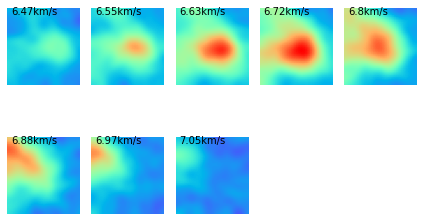

min,TTT 6.29 km/s
max,TTT 7.090000000000001 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


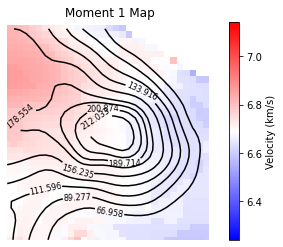

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


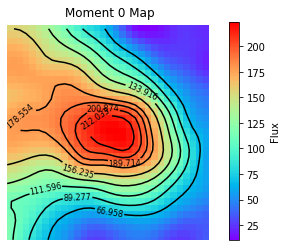

12CO@M236


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

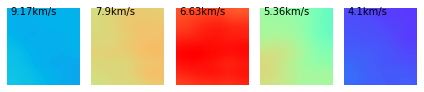

min,TTT 4.095018238440984 km/s
max,TTT 9.174579823571431 km/s


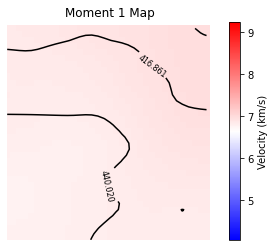

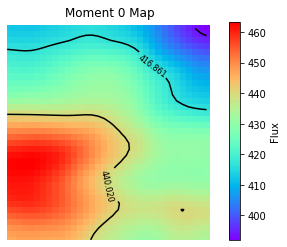

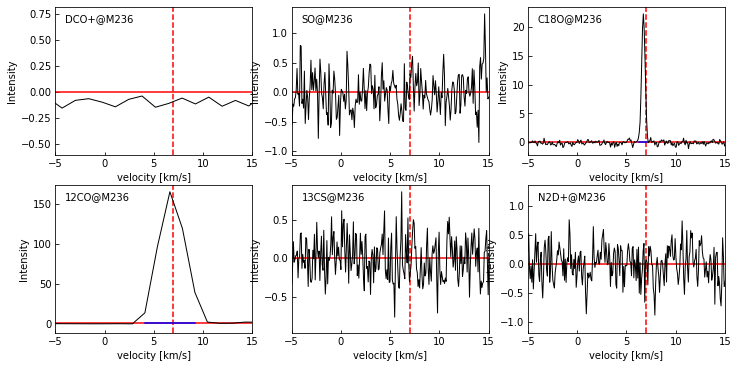

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M350   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M350


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x1008 with 0 Axes>

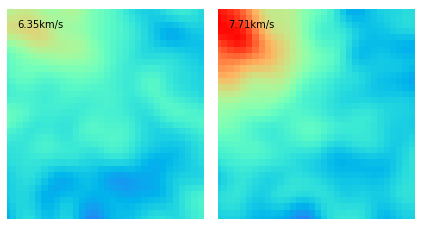

min,TTT 6.353453762587284 km/s
max,TTT 7.708109234453283 km/s
C18O@M350


<Figure size 3024x3024 with 0 Axes>

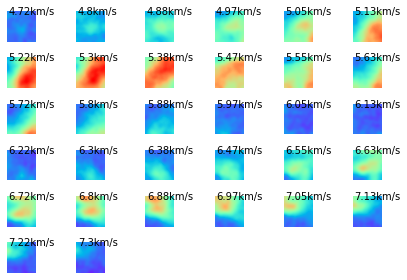

min,TTT 4.717288193523001 km/s
max,TTT 7.300718741339084 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


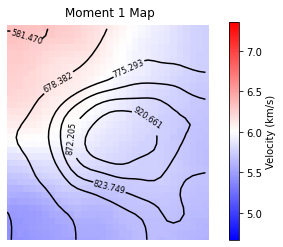

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


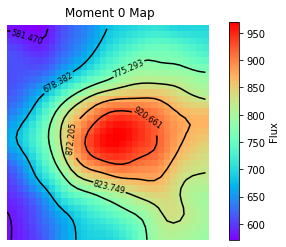

12CO@M350


<Figure size 504x2520 with 0 Axes>

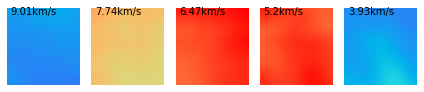

min,TTT 3.9292475318261073 km/s
max,TTT 9.008811925714157 km/s


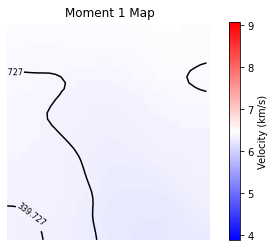

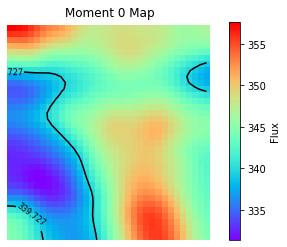

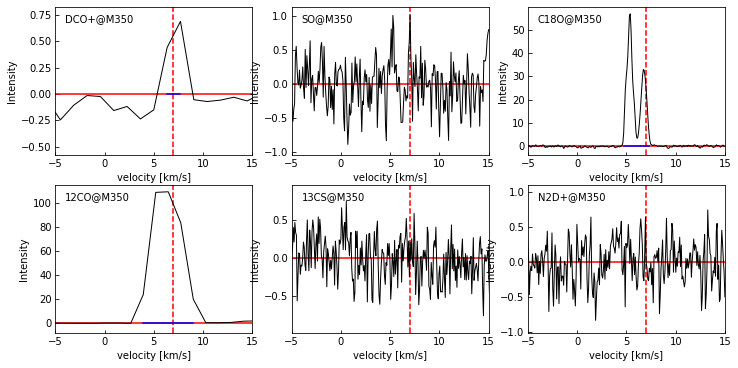

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M449   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M449


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

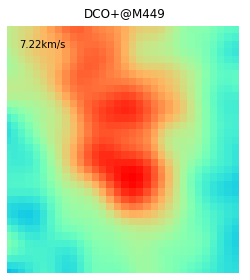

min,TTT 7.218775873880921 km/s
max,TTT 7.218775873880921 km/s
C18O@M449


<Figure size 3024x2520 with 0 Axes>

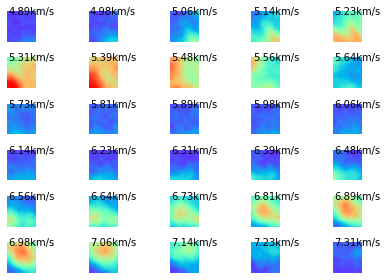

min,TTT 4.893804627687826 km/s
max,TTT 7.31047746686921 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


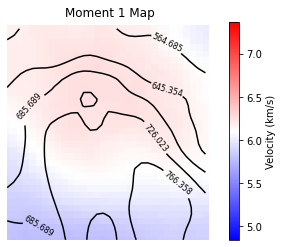

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


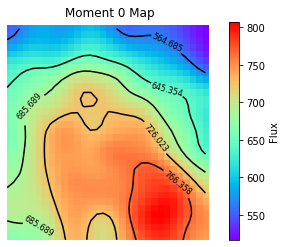

12CO@M449


<Figure size 504x2520 with 0 Axes>

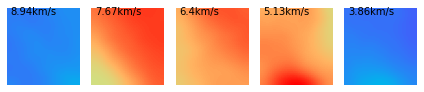

min,TTT 3.8570040740212144 km/s
max,TTT 8.936387337808066 km/s


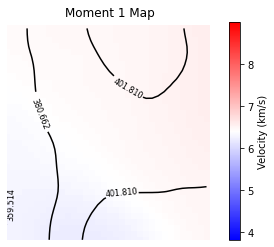

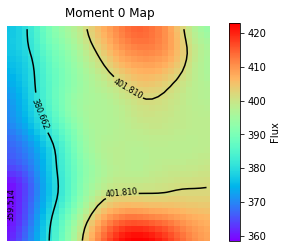

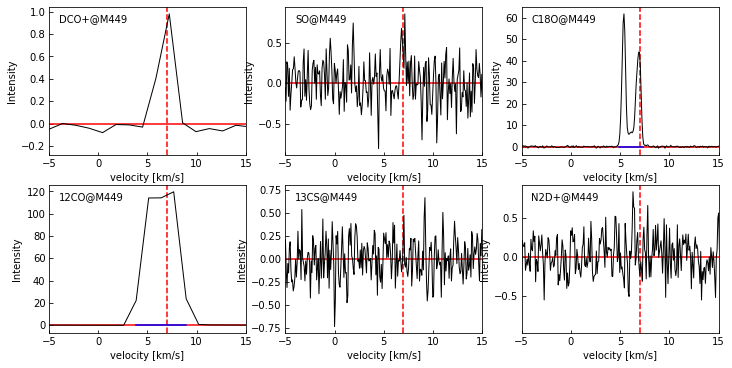

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M493   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M493


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

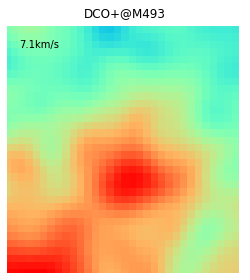

min,TTT 7.103397663310471 km/s
max,TTT 7.103397663310471 km/s
C18O@M493


<Figure size 3024x2520 with 0 Axes>

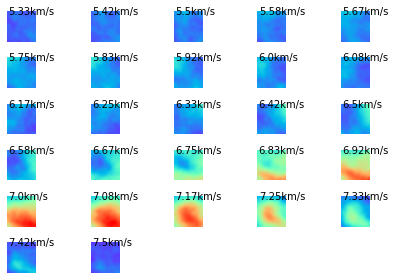

min,TTT 5.33471729131259 km/s
max,TTT 7.50139617655697 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


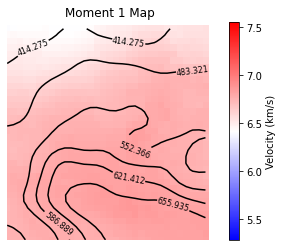

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


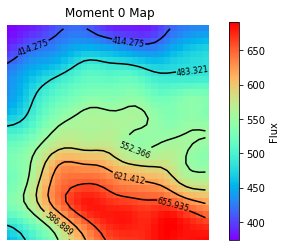

12CO@M493


<Figure size 504x2016 with 0 Axes>

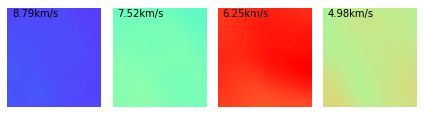

min,TTT 4.978218636719879 km/s
max,TTT 8.787769085659871 km/s


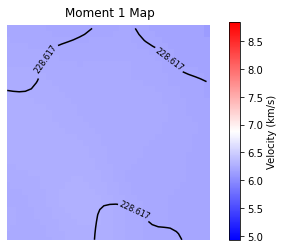

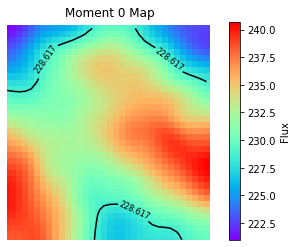

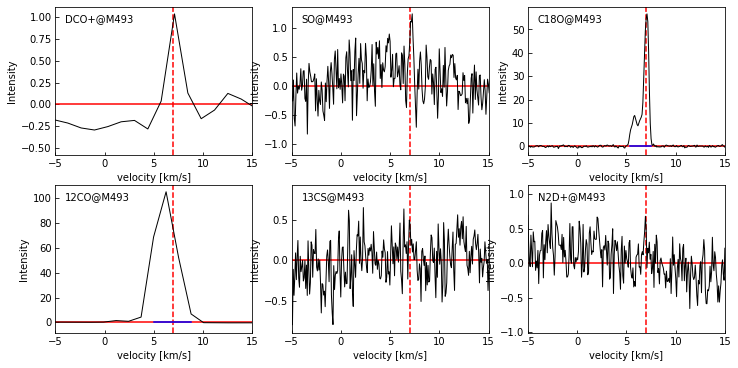

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M262   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M262


<Figure size 3024x3024 with 0 Axes>

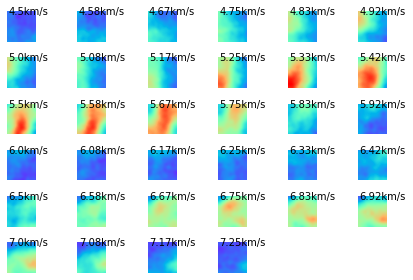

min,TTT 4.499062269589431 km/s
max,TTT 7.249073979788579 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


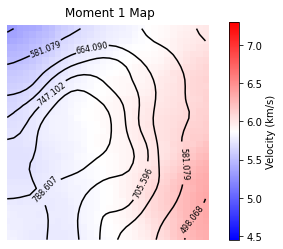

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


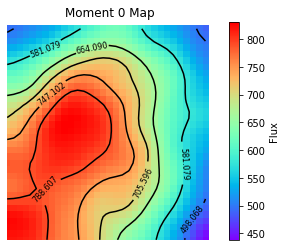

12CO@M262


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

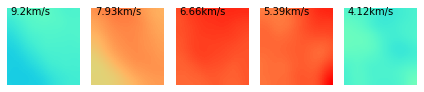

min,TTT 4.117049351163815 km/s
max,TTT 9.196443025164502 km/s


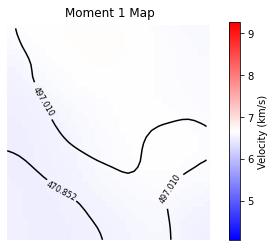

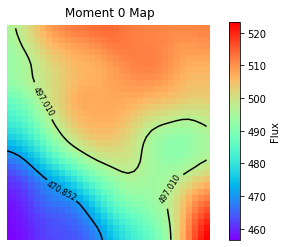

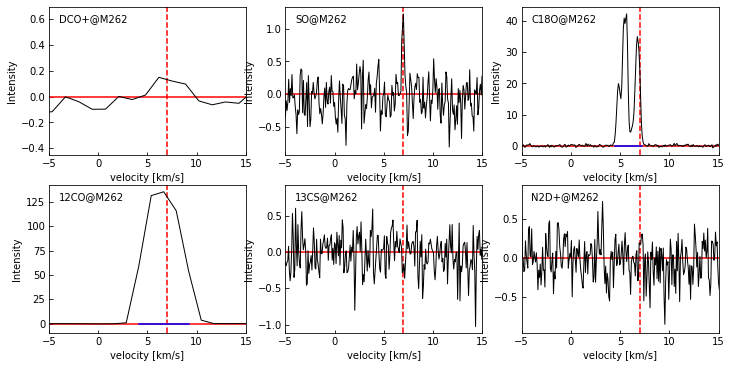

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M365   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M365


<Figure size 2520x2520 with 0 Axes>

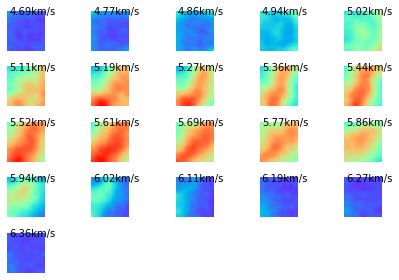

min,TTT 4.6892127448408765 km/s
max,TTT 6.355942287205472 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


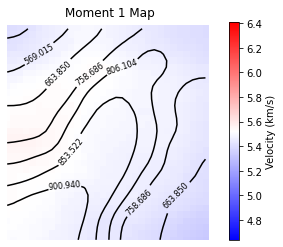

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


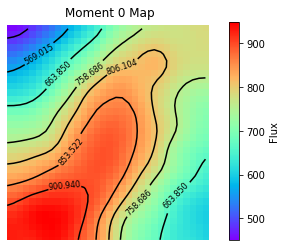

12CO@M365


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

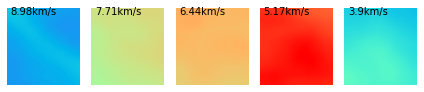

min,TTT 3.901171909205168 km/s
max,TTT 8.980736778680297 km/s


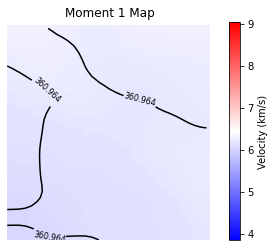

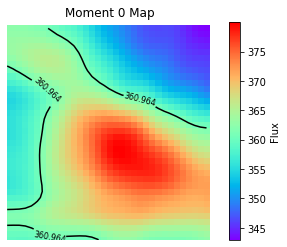

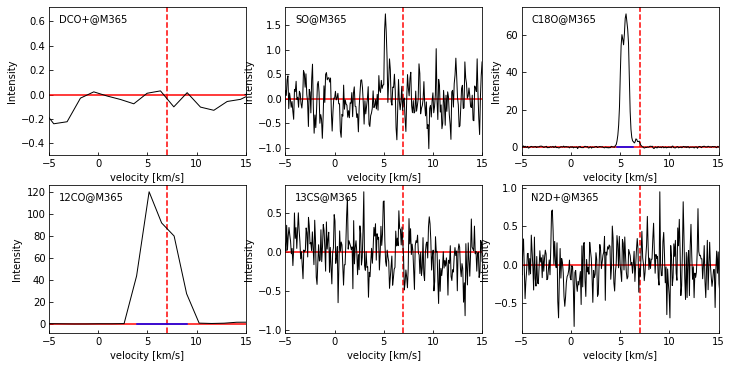

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M456   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M456


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x1008 with 0 Axes>

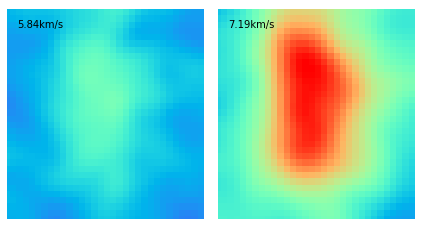

min,TTT 5.8394975104136755 km/s
max,TTT 7.194105576607277 km/s
C18O@M456


<Figure size 2016x2520 with 0 Axes>

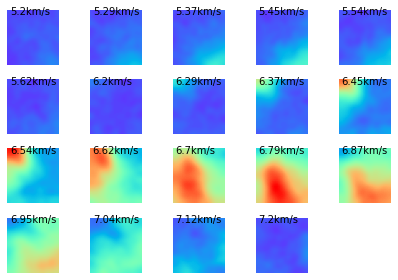

min,TTT 5.202468281936794 km/s
max,TTT 7.202473554235443 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


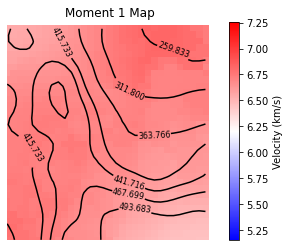

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


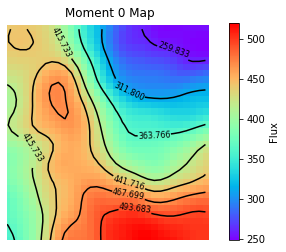

12CO@M456


<Figure size 504x2520 with 0 Axes>

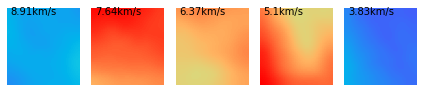

min,TTT 3.834756316343131 km/s
max,TTT 8.914139957297841 km/s


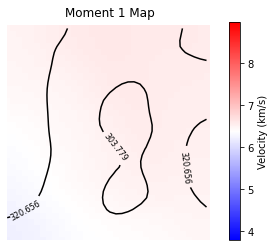

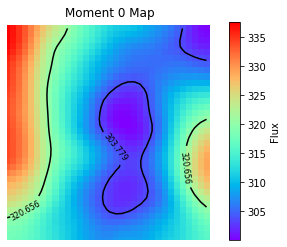

N2D+@M456


<Figure size 504x1512 with 0 Axes>

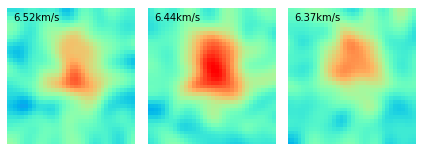

min,TTT 6.365772268992767 km/s
max,TTT 6.523965284866145 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide


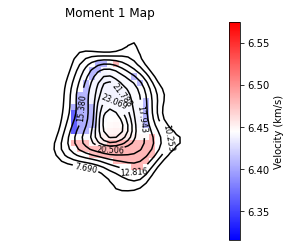

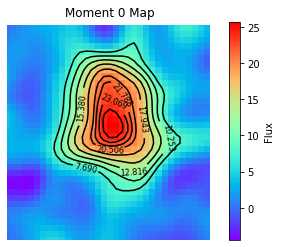

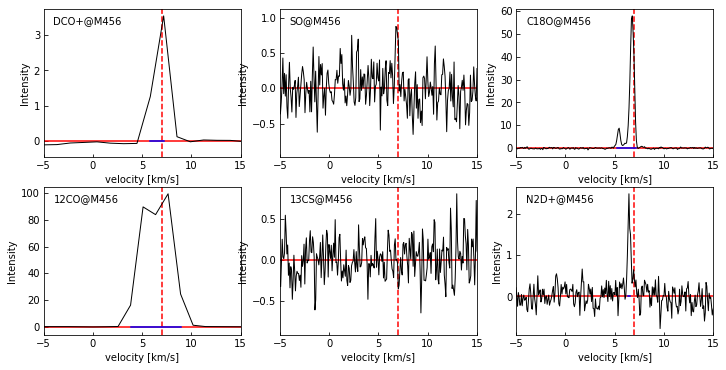

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M503   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M503


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

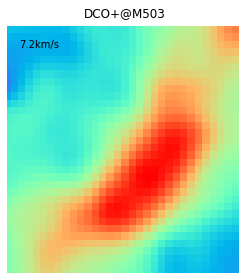

min,TTT 7.200783916313288 km/s
max,TTT 7.200783916313288 km/s
C18O@M503


<Figure size 2520x2520 with 0 Axes>

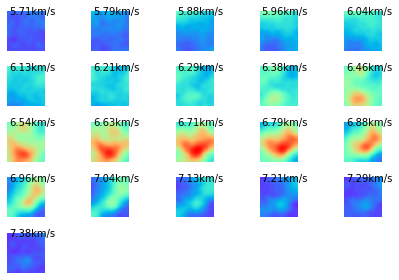

min,TTT 5.710016930684121 km/s
max,TTT 7.37674913822109 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


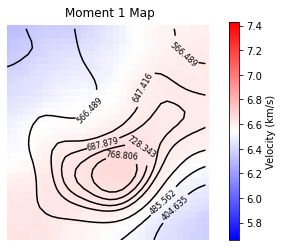

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


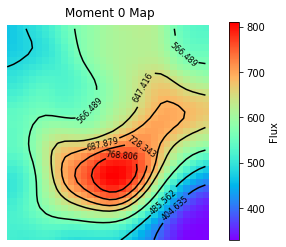

12CO@M503


<Figure size 1008x2520 with 0 Axes>

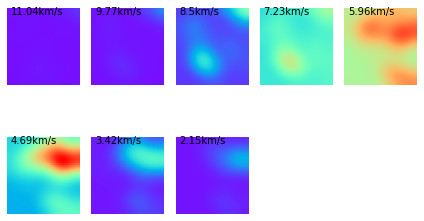

min,TTT 2.1520225685968772 km/s
max,TTT 11.041275301120308 km/s


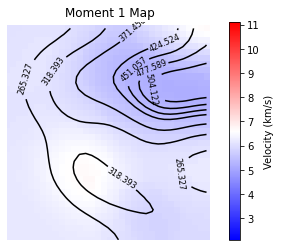

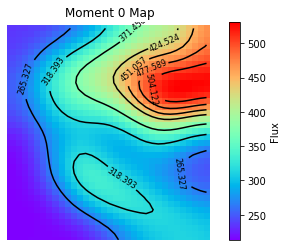

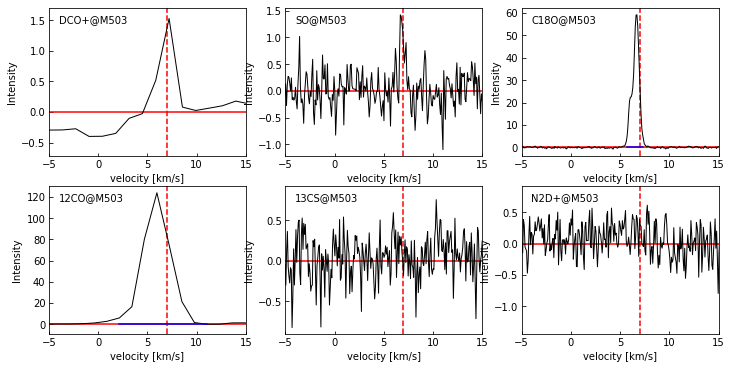

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M273   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M273


<Figure size 2016x2520 with 0 Axes>

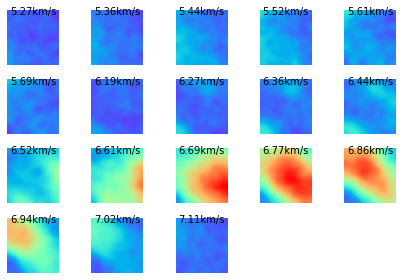

min,TTT 5.271984114774659 km/s
max,TTT 7.105325113731628 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


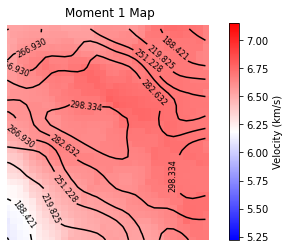

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


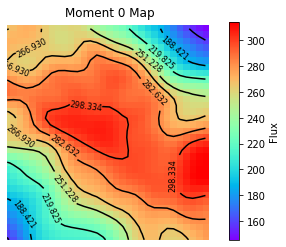

12CO@M273


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 1008x2520 with 0 Axes>

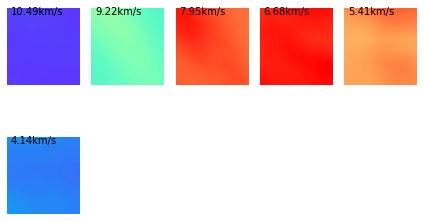

min,TTT 4.141595370702854 km/s
max,TTT 10.490836943327986 km/s


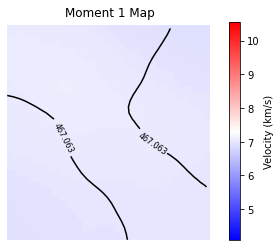

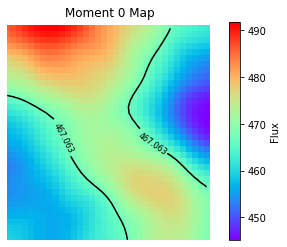

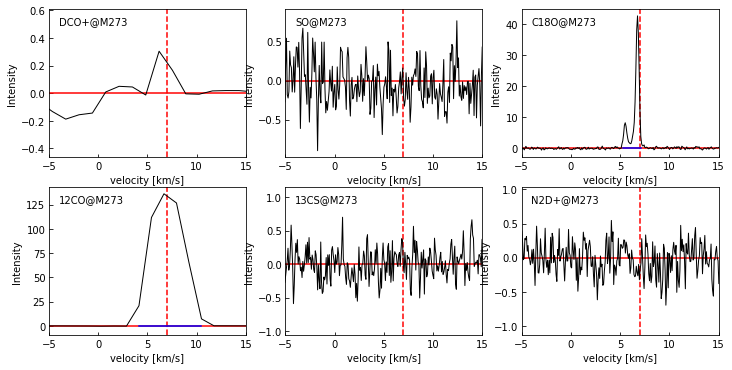

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M387   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


SO@M387


<Figure size 504x2016 with 0 Axes>

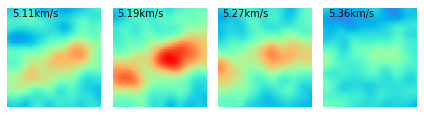

min,TTT 5.106144012966708 km/s
max,TTT 5.355702303546908 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


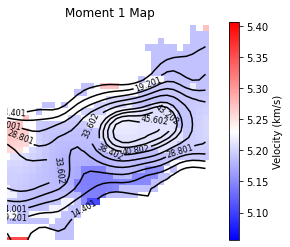

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


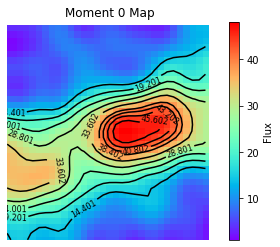

C18O@M387


<Figure size 2520x2520 with 0 Axes>

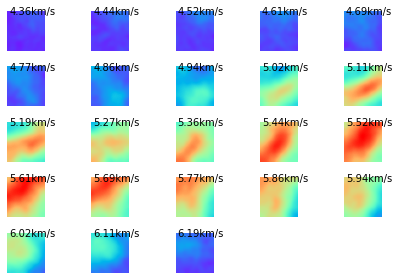

min,TTT 4.358062749015756 km/s
max,TTT 6.191399963727976 km/s


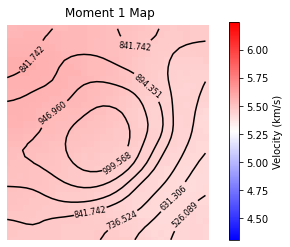

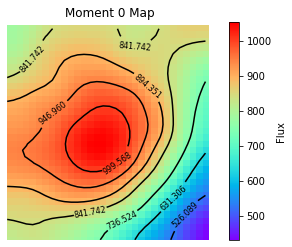

12CO@M387


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

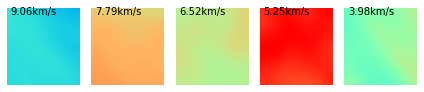

min,TTT 3.9824582683508605 km/s
max,TTT 9.061839406917478 km/s


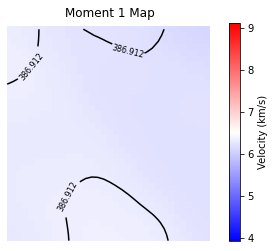

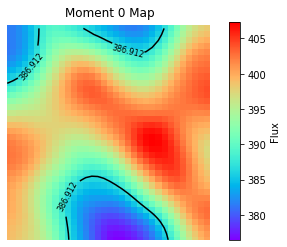

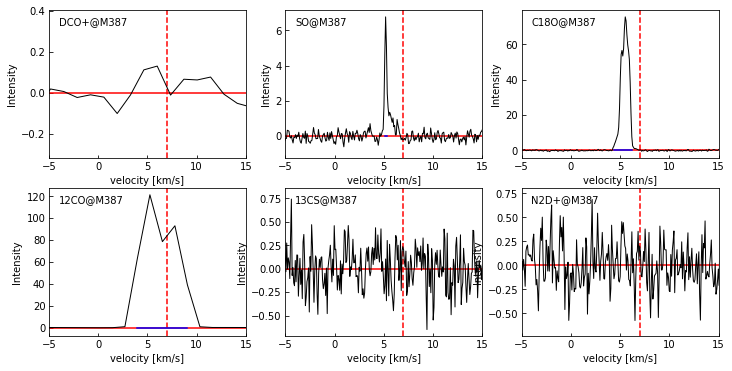

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M457   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M457


<Figure size 2016x2520 with 0 Axes>

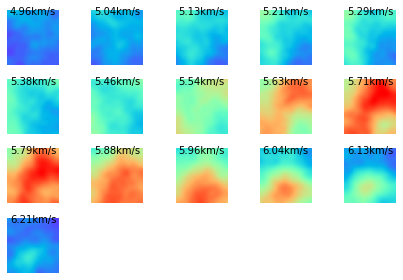

min,TTT 4.959739028351394 km/s
max,TTT 6.209745556247129 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


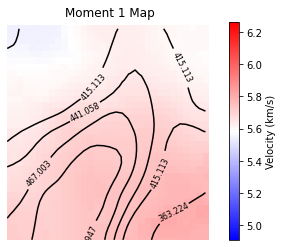

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


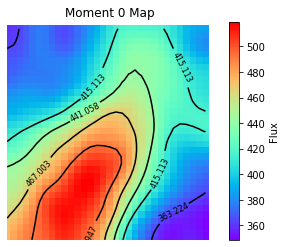

12CO@M457


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

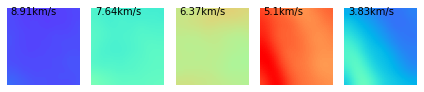

min,TTT 3.8304094082539524 km/s
max,TTT 8.909807939084505 km/s


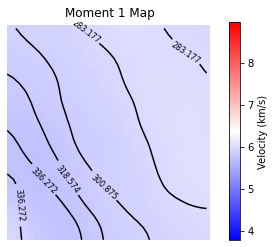

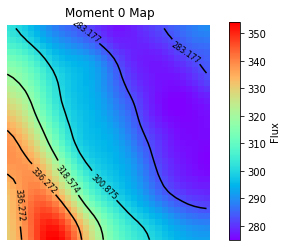

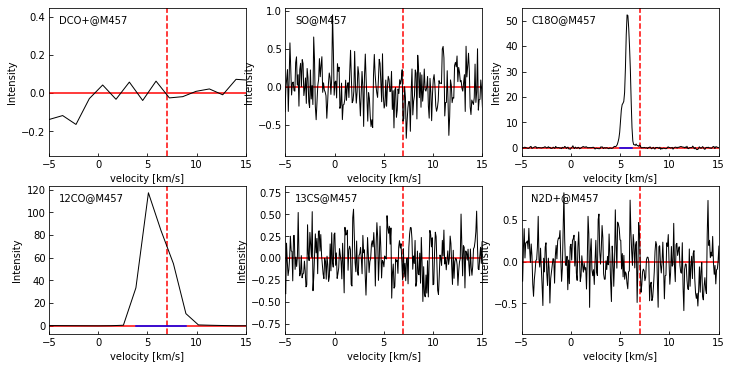

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M505   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M505


<Figure size 2016x2520 with 0 Axes>

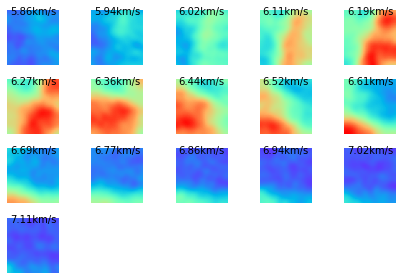

min,TTT 5.8552216880272665 km/s
max,TTT 7.105270932435733 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


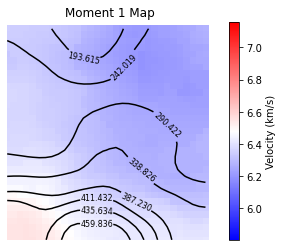

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


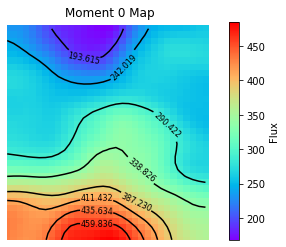

12CO@M505


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2016 with 0 Axes>

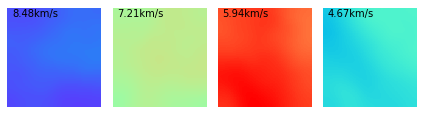

min,TTT 4.670340642622438 km/s
max,TTT 8.480020657769598 km/s


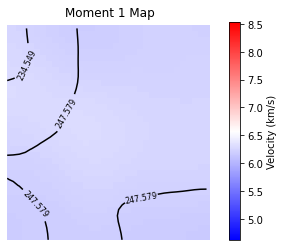

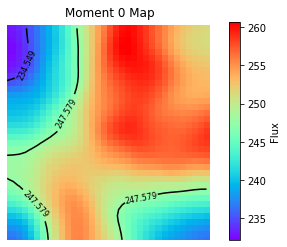

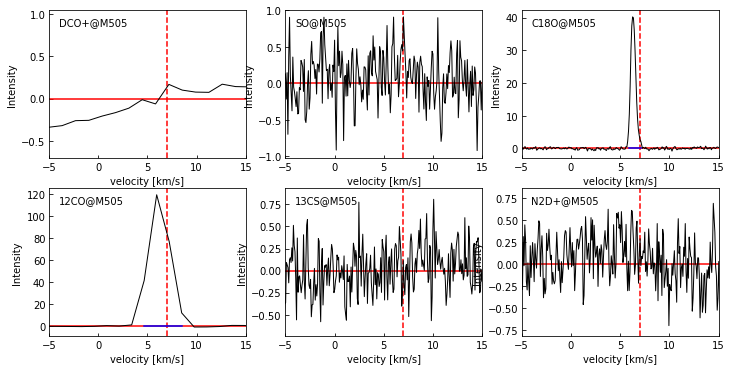

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M275   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M275


<Figure size 2520x2520 with 0 Axes>

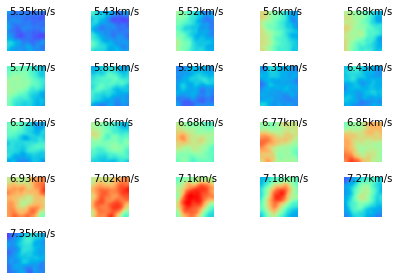

min,TTT 5.351083256297397 km/s
max,TTT 7.351091646797718 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


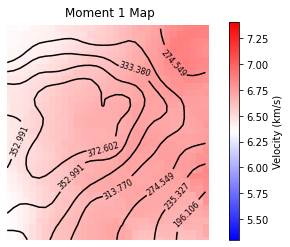

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


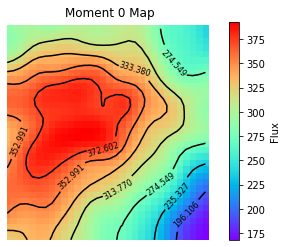

12CO@M275


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 1008x2520 with 0 Axes>

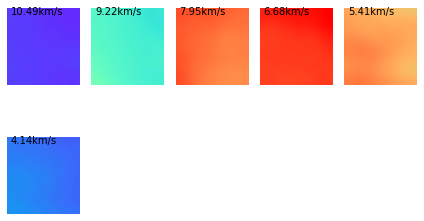

min,TTT 4.139004386661431 km/s
max,TTT 10.488246014052097 km/s


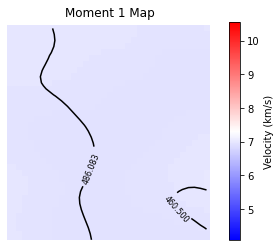

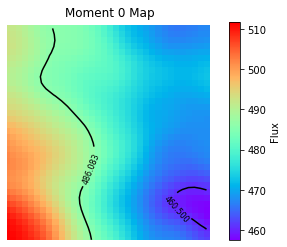

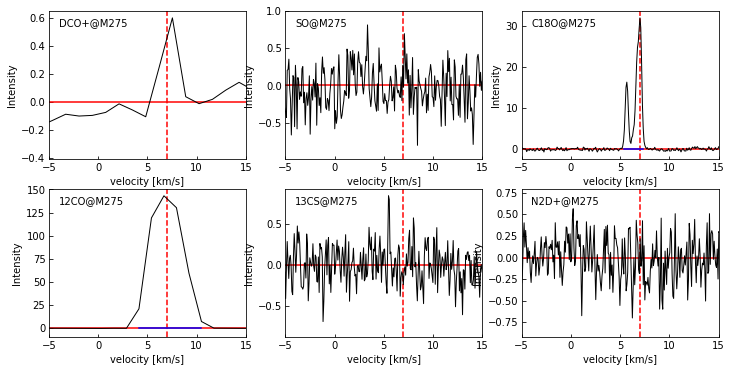

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M389   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M389


<Figure size 2520x2520 with 0 Axes>

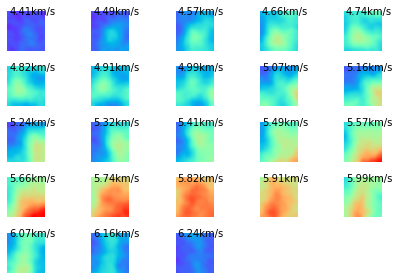

min,TTT 4.406193048306641 km/s
max,TTT 6.2395957465874075 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


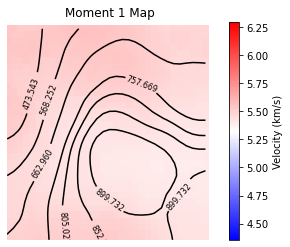

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


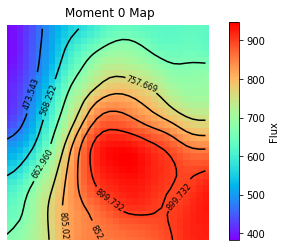

12CO@M389


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2520 with 0 Axes>

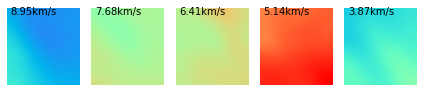

min,TTT 3.868161559056051 km/s
max,TTT 8.94772698793334 km/s


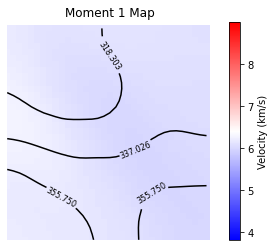

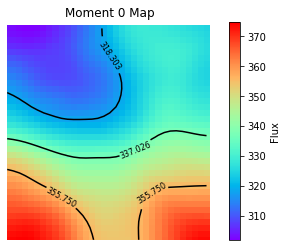

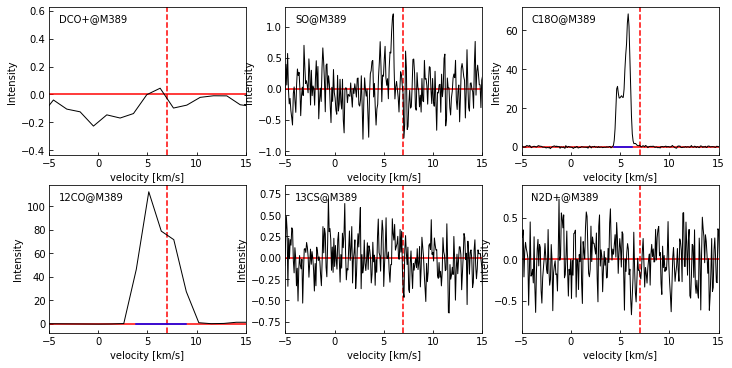

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M463   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M463


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x1008 with 0 Axes>

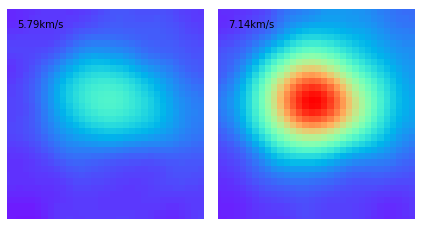

min,TTT 5.787169463223331 km/s
max,TTT 7.141777765895377 km/s
SO@M463


<Figure size 1008x2520 with 0 Axes>

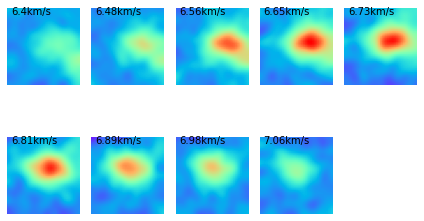

min,TTT 6.395569888451474 km/s
max,TTT 7.061059124544581 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


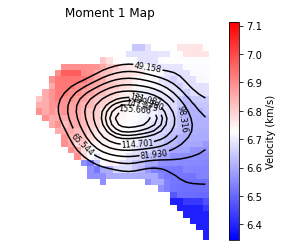

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


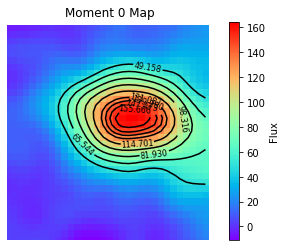

C18O@M463


<Figure size 3024x3024 with 0 Axes>

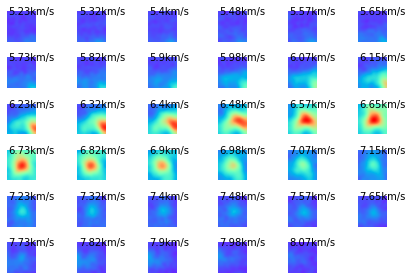

min,TTT 5.2334736676571305 km/s
max,TTT 8.066814963112105 km/s


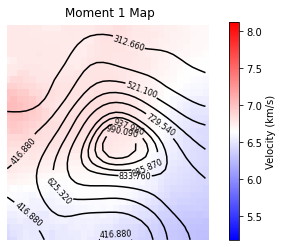

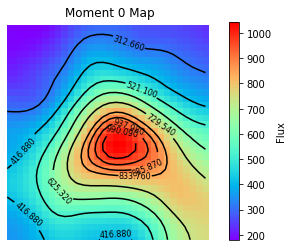

12CO@M463


<Figure size 1008x2520 with 0 Axes>

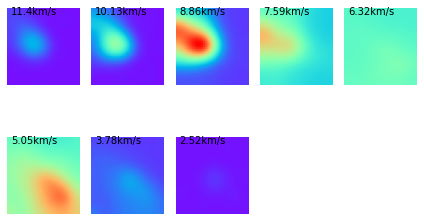

min,TTT 2.5150256377353664 km/s
max,TTT 11.403948488393029 km/s


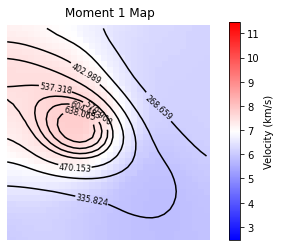

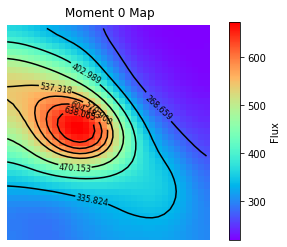

N2D+@M463


<Figure size 1008x2520 with 0 Axes>

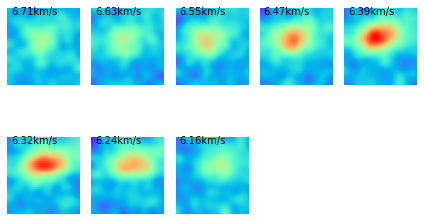

min,TTT 6.157695128033845 km/s
max,TTT 6.711370775506566 km/s


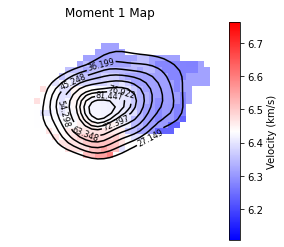

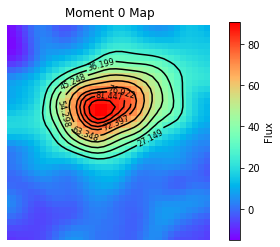

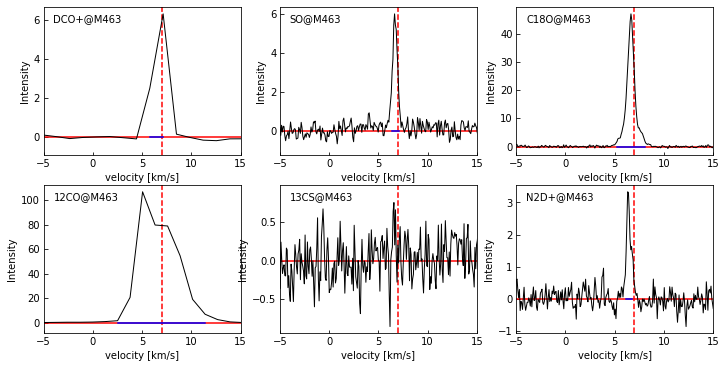

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M508   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M508


<Figure size 2016x2520 with 0 Axes>

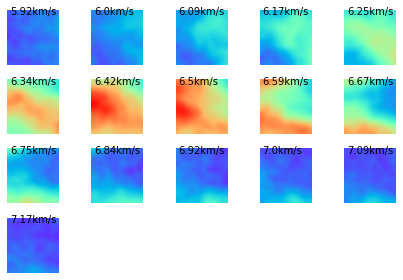

min,TTT 5.919151826896575 km/s
max,TTT 7.169201153810377 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


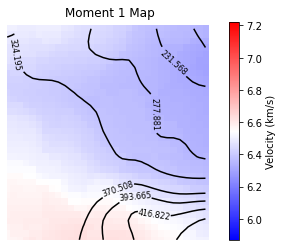

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


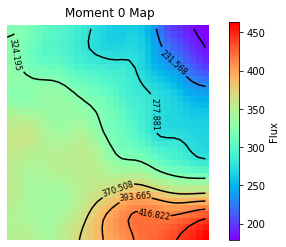

12CO@M508


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x2016 with 0 Axes>

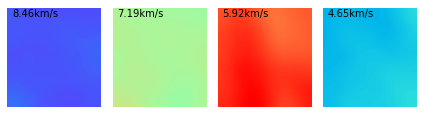

min,TTT 4.650933906154389 km/s
max,TTT 8.460614167984566 km/s


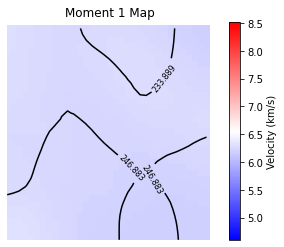

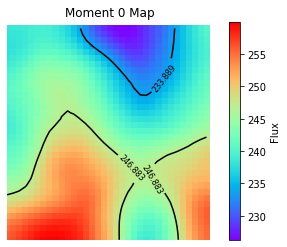

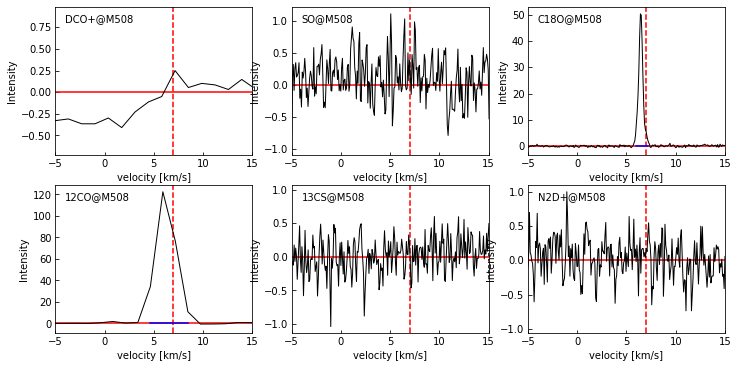

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M295_296_280_281   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


SO@M295_296_280_281


<Figure size 504x2520 with 0 Axes>

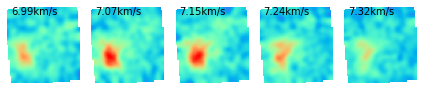

min,TTT 6.988551460145745 km/s
max,TTT 7.321298203896425 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


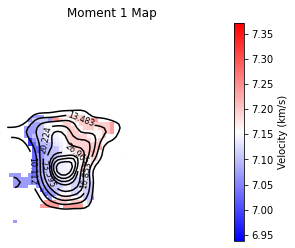

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


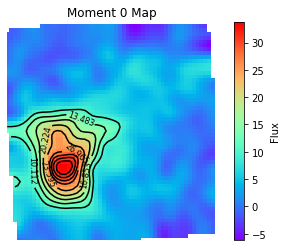

C18O@M295_296_280_281


<Figure size 3528x3528 with 0 Axes>

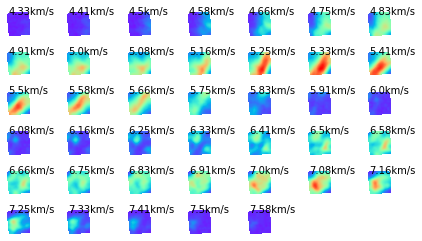

min,TTT 4.330878967628087 km/s
max,TTT 7.580908866243004 km/s


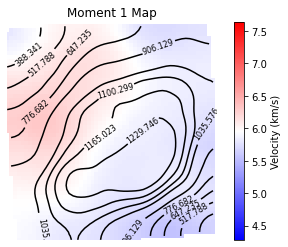

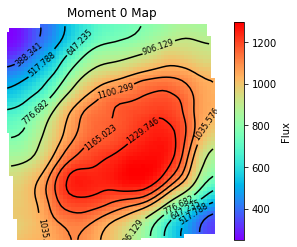

12CO@M295_296_280_281


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 1008x2520 with 0 Axes>

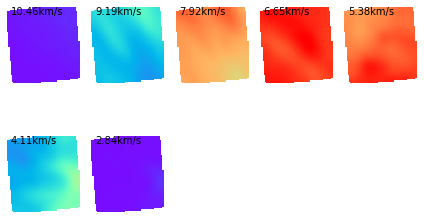

min,TTT 2.84256832547856 km/s
max,TTT 10.461698288618432 km/s


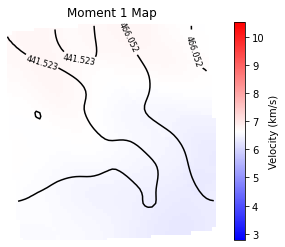

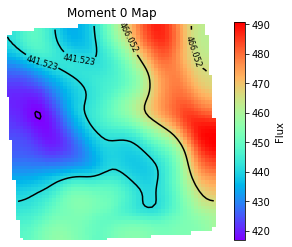

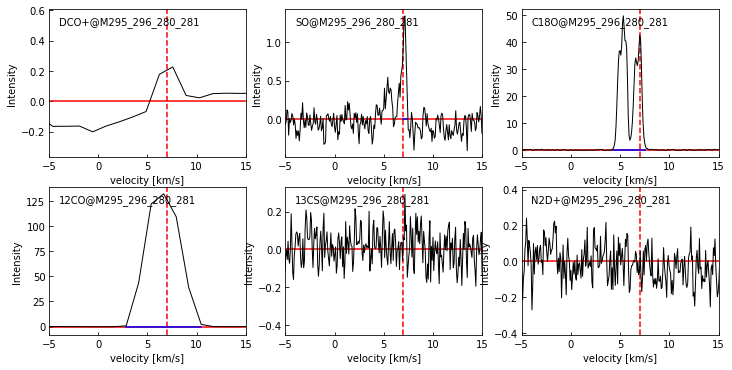

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M424   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


C18O@M424


<Figure size 2520x2520 with 0 Axes>

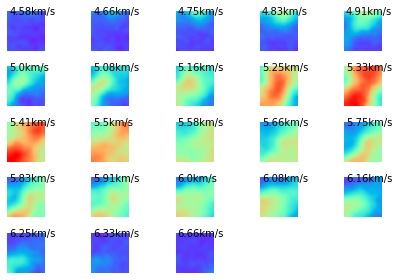

min,TTT 4.578681201896811 km/s
max,TTT 6.662093898652278 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


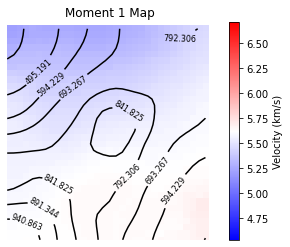

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


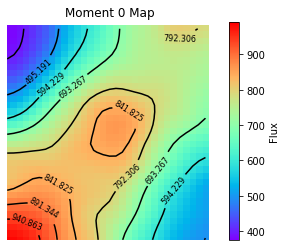

12CO@M424


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 1008x2520 with 0 Axes>

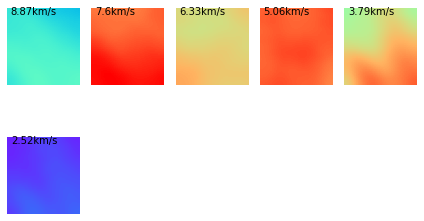

min,TTT 2.5207486472359597 km/s
max,TTT 8.870207074711209 km/s


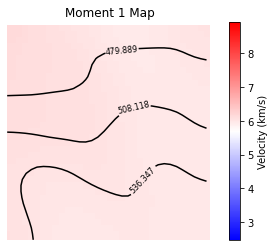

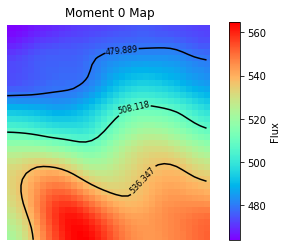

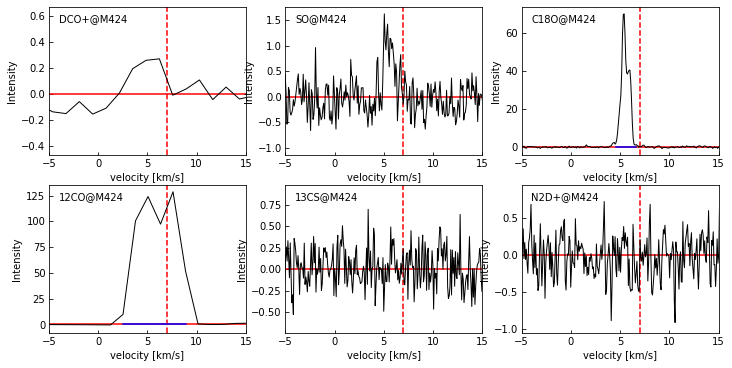

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M465   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M465


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

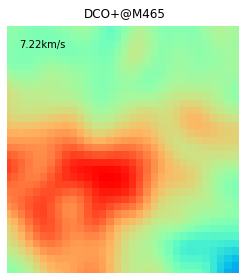

min,TTT 7.215025582764546 km/s
max,TTT 7.215025582764546 km/s
C18O@M465


<Figure size 2016x2520 with 0 Axes>

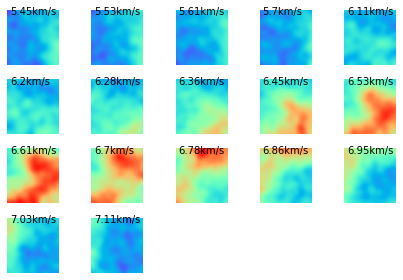

min,TTT 5.446345937087855 km/s
max,TTT 7.113021384287126 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


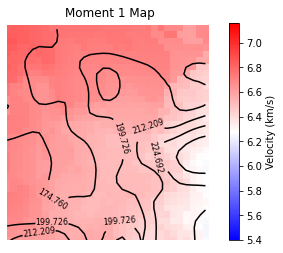

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


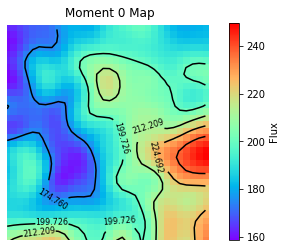

12CO@M465


<Figure size 504x2520 with 0 Axes>

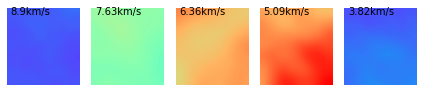

min,TTT 3.8185709383984276 km/s
max,TTT 8.897969669877202 km/s


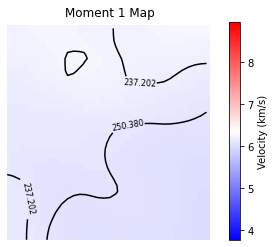

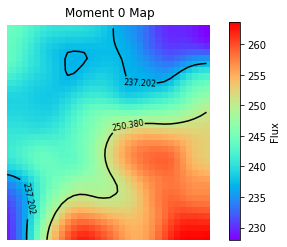

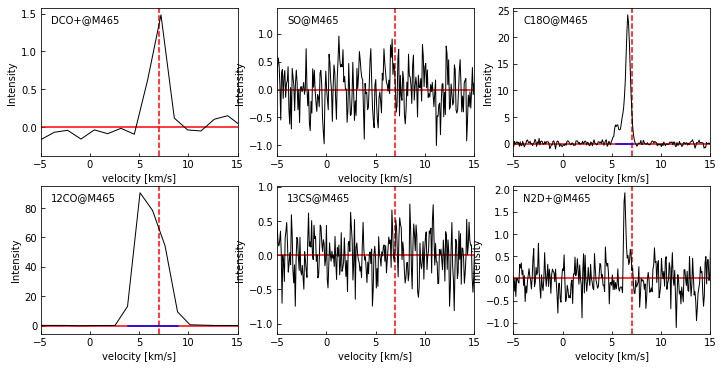

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M510_M513_M514   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M510_M513_M514


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

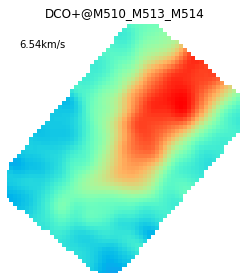

min,TTT 6.5440245984255325 km/s
max,TTT 6.5440245984255325 km/s
C18O@M510_M513_M514


<Figure size 2016x2520 with 0 Axes>

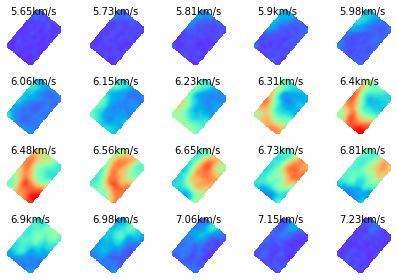

min,TTT 5.64588479641723 km/s
max,TTT 7.229280743516649 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


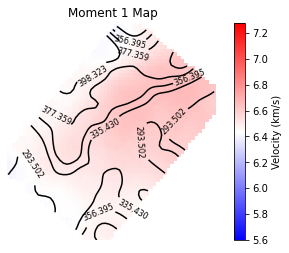

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


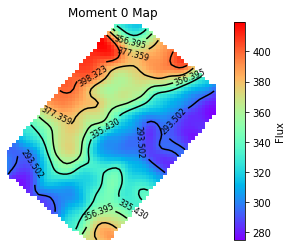

12CO@M510_M513_M514


<Figure size 504x1512 with 0 Axes>

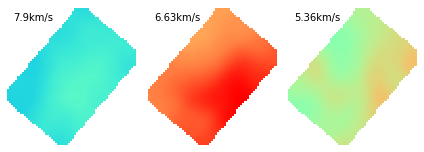

min,TTT 5.3615740664343905 km/s
max,TTT 7.9013611233830945 km/s


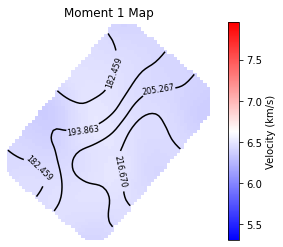

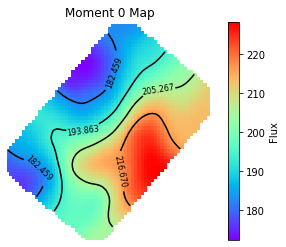

N2D+@M510_M513_M514


<Figure size 504x2016 with 0 Axes>

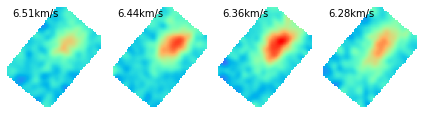

min,TTT 6.277344906721816 km/s
max,TTT 6.514643328497138 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide


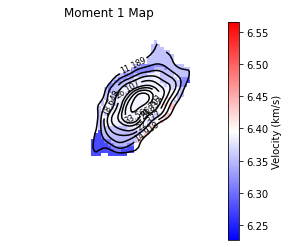

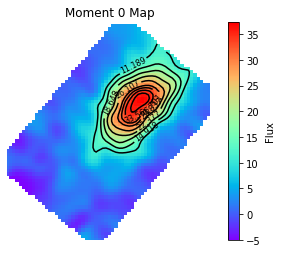

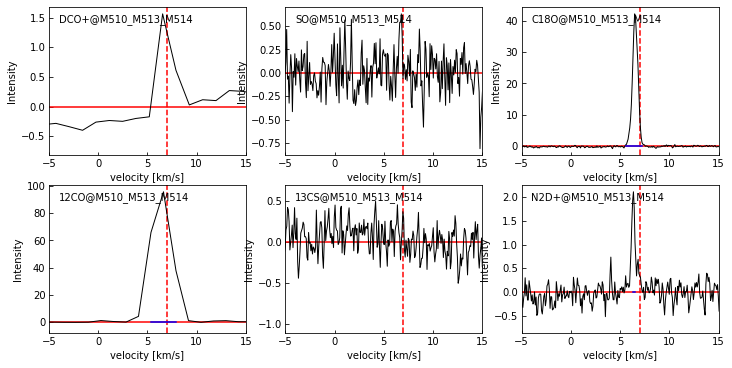

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M308   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M308


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 504x1008 with 0 Axes>

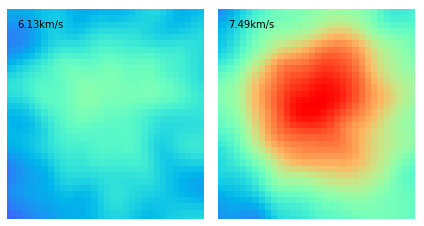

min,TTT 6.13354380465569 km/s
max,TTT 7.488150542150336 km/s
C18O@M308


<Figure size 2520x2520 with 0 Axes>

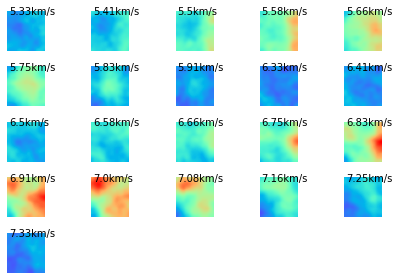

min,TTT 5.329848307947993 km/s
max,TTT 7.329851618119738 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


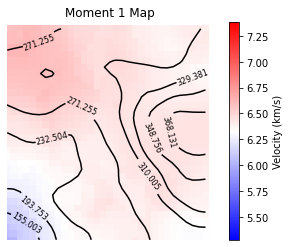

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


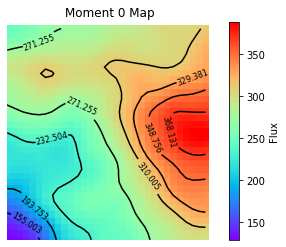

12CO@M308


<Figure size 1008x2520 with 0 Axes>

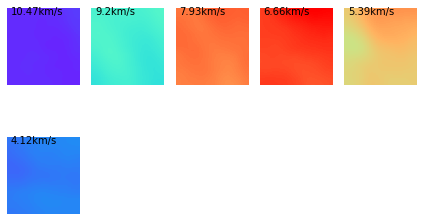

min,TTT 4.117324759498245 km/s
max,TTT 10.46654832616797 km/s


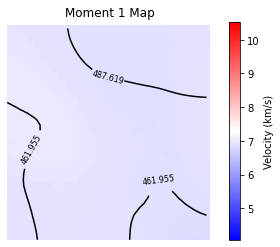

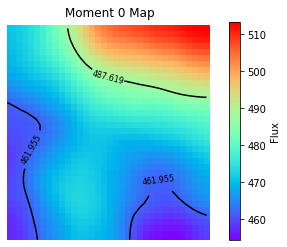

N2D+@M308


<Figure size 504x1008 with 0 Axes>

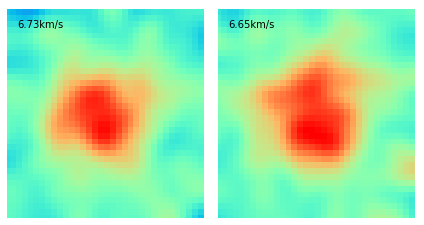

min,TTT 6.648338412252624 km/s
max,TTT 6.727434845517532 km/s


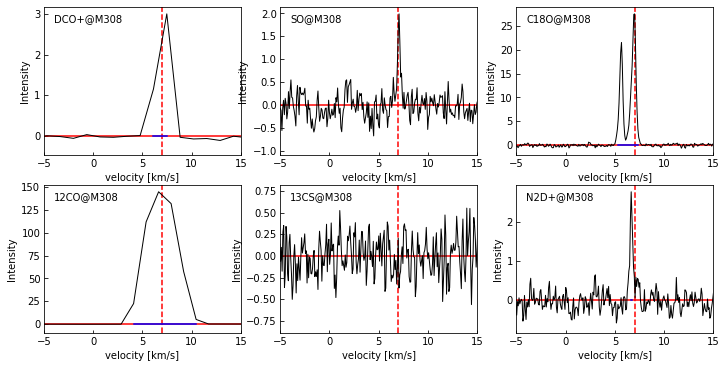

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M426   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


SO@M426


<Figure size 1008x2520 with 0 Axes>

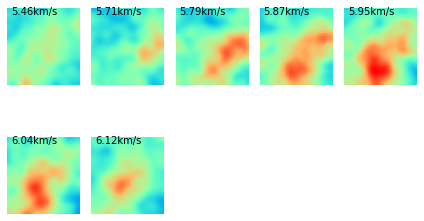

min,TTT 5.4558510394495565 km/s
max,TTT 6.121339960746781 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in true_divide
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


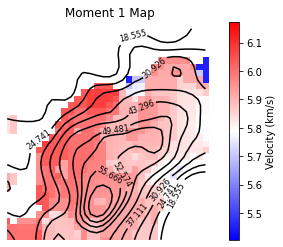

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


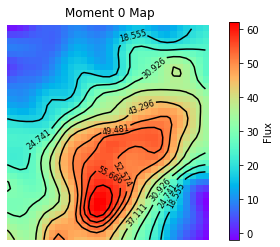

C18O@M426


<Figure size 2520x2520 with 0 Axes>

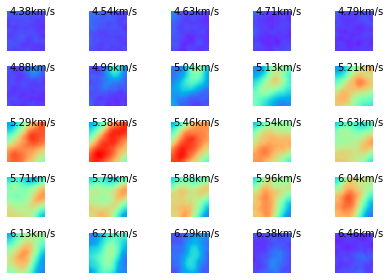

min,TTT 4.375172458311287 km/s
max,TTT 6.45851066274889 km/s


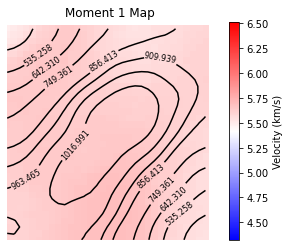

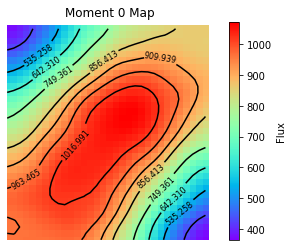

12CO@M426


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered


<Figure size 1008x2520 with 0 Axes>

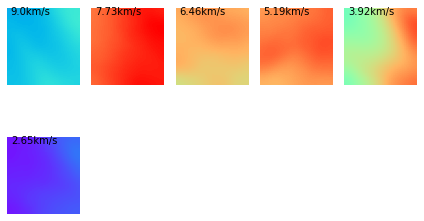

min,TTT 2.6493007672645192 km/s
max,TTT 8.998528531831544 km/s


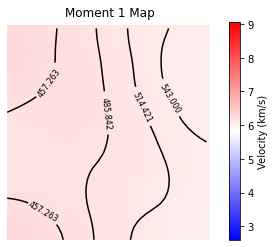

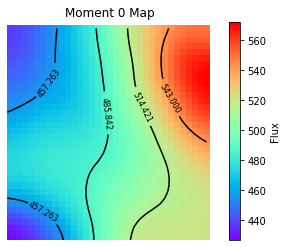

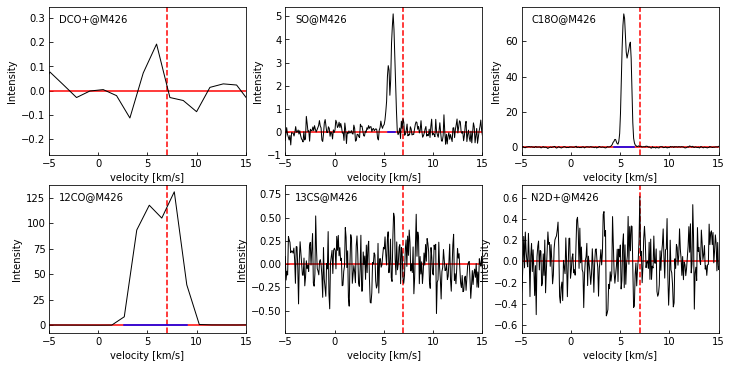

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||     M490   ||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: All-NaN slice encountered


DCO+@M490


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:129: RuntimeWarning: All-NaN slice encountered
/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 504x504 with 0 Axes>

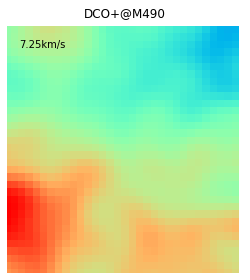

min,TTT 7.25246794499071 km/s
max,TTT 7.25246794499071 km/s
C18O@M490


<Figure size 3024x2520 with 0 Axes>

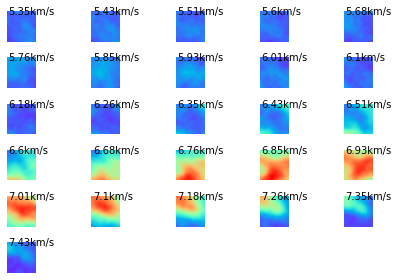

min,TTT 6.609999999999999 km/s
max,TTT 7.41 km/s


/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:192: UserWarning: The following kwargs were not used by contour: 'lw'


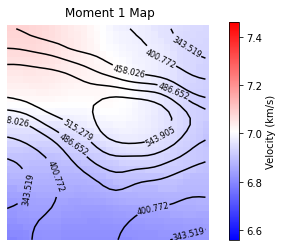

/Users/yoshitoshimajiri/opt/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: The following kwargs were not used by contour: 'lw'


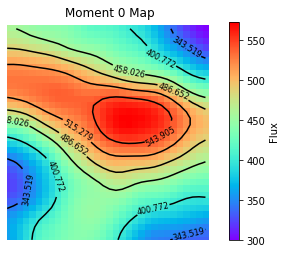

12CO@M490


<Figure size 504x2016 with 0 Axes>

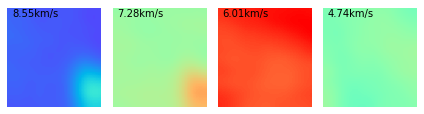

min,TTT 4.7434935499946675 km/s
max,TTT 8.553172635556402 km/s


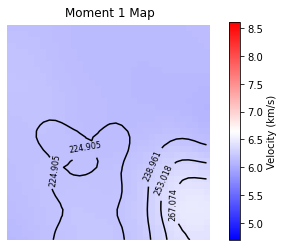

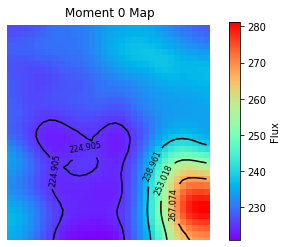

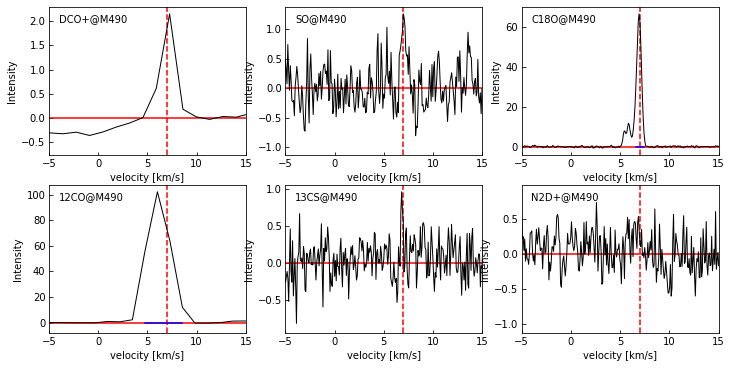

In [8]:
# select targets  
dir="./TP_FITS/"
dir_eachs=["M236", "M350", "M449", "M493",
           "M262", "M365", "M456", "M503",
           "M273", "M387", "M457", "M505",
           "M275", "M389", "M463", "M508",
           "M295_296_280_281", "M424", "M465", "M510_M513_M514",
           "M308", "M426", "M490"]
#dir_eachs=["M490"]
#dir_eachs=["M510_M513_M514"]

target=[]
mole=[]
detect_status=[]

for j in range(len(dir_eachs)):
    dir_each=dir_eachs[j]
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("||||||||||||||||||||||||||||||||||||||||     "+dir_each+"   ||||||||||||||||||||||||||||||||||||||||||||||")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")
    print("||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||")

    directory_path = dir+dir_each  # Change the path following your environment  
    files_in_directory = get_files_in_directory(directory_path)
    file_name_common=files_in_directory[0][:-21]

    spws=["spw17","spw19","spw21","spw23","spw25","spw27"]

    Vsys=7.0
    range_value=5.0
    thresh=7.5#sigma

    mom_range_begin=[]
    mom_range_end=[]
    
    for i in range(len(spws)):
        spw=spws[i]
        file_end,freq_rest,mole_name=frest_mole(spw)
        fits_file_path=dir+dir_each+"/"+file_name_common+file_end
        image_data,velocity_axis_kms,naxis1_value,naxis2_value,naxis3_value,bmag_value,header= read_fits(fits_file_path, freq_rest) 

        rms_start_ch=int(naxis3_value*2./10)
        rms_end_ch=int(naxis3_value*4./10)
        selected_channels = image_data[rms_start_ch:rms_end_ch]
        rms=np.nanstd(selected_channels)
        
        
        velo_range_count=0
        SN_value=0.
        for k in range(len(velocity_axis_kms)):
            max_value_map=np.nanmax(image_data[k])
            if (velocity_axis_kms[k] >= Vsys- range_value ) and (velocity_axis_kms[k] <= Vsys+ range_value ):
                SN_value_tmp=max_value_map/rms
                if SN_value_tmp >= SN_value:
                    SN_value=round(SN_value_tmp,1)
                if (max_value_map >= rms*thresh):
                    velo_range_count=velo_range_count+1
                
        if velo_range_count == 0:
            target.append(dir_each)
            mole.append(mole_name)
            #detect_status.append("X")
            input="X ("+str(SN_value)+")"
            detect_status.append(input)
            
        if velo_range_count != 0:
            target.append(dir_each)
            mole.append(mole_name)
            #detect_status.append("O")
            input="O ("+str(SN_value)+")"
            detect_status.append(input)
            
        default_size=7
        default_size2=7
        
        
        if velo_range_count == 1:
            plot_x,plot_y=1,1
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size
        if velo_range_count == 2:
            plot_x,plot_y=1,2            
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size
        if velo_range_count == 3:
            plot_x,plot_y=1,3            
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size
        if velo_range_count == 4:
            plot_x,plot_y=1,4            
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size
        if velo_range_count == 5:
            plot_x,plot_y=1,5            
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size
        if (velo_range_count >= 6) and (velo_range_count <= 10):
            plot_x,plot_y=2,5           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2    
        if (velo_range_count >= 11) and (velo_range_count <= 15):
            plot_x,plot_y=3,5           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2
        if (velo_range_count >= 16) and (velo_range_count <= 20):
            plot_x,plot_y=4,5           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2
        if (velo_range_count >= 21) and (velo_range_count <= 25):
            plot_x,plot_y=5,5           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2
        if (velo_range_count >= 26) and (velo_range_count <= 30):
            plot_x,plot_y=6,5           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2       
        if (velo_range_count >= 31) and (velo_range_count <= 36):
            plot_x,plot_y=6,6           
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2
        if (velo_range_count >= 37) :
            plot_x,plot_y=7,7
            figsize_x,figsize_y=plot_x*default_size,plot_y*default_size2
            
        if velo_range_count == 0:            
            mom_range_begin.append(-100)
            mom_range_end.append(100)
            
        if velo_range_count >= 1:
            velo_range_count=0
            plt.figure(figsize=(figsize_x,figsize_y))
            plt.figure()
            plt.title(mole_name+"@"+dir_each)
            text=mole_name+"@"+dir_each
            print(text)
            mom_min_velo=100.
            mom_max_velo=-100.
            for k in range(len(velocity_axis_kms)):
                max_value_map=np.nanmax(image_data[k])
                if (velocity_axis_kms[k] >= Vsys- range_value ) and (velocity_axis_kms[k] <= Vsys+ range_value ):
                    if (max_value_map >= rms*thresh):
                        if velocity_axis_kms[k] <= mom_min_velo:
                            mom_min_velo=velocity_axis_kms[k]
                        if velocity_axis_kms[k] >= mom_max_velo:
                            mom_max_velo=velocity_axis_kms[k]                        
                        
                        velo_range_count=velo_range_count+1
                        num=velo_range_count
                        plt.subplot(plot_x,plot_y,num)
                        plt.xlim(0,naxis1_value)
                        plt.ylim(0,naxis2_value)
                        plt.imshow(image_data[k],cmap="rainbow",vmin=np.nanmin(image_data),vmax=np.nanmax(image_data))
                        relative_x=0.05
                        relative_y=0.9
                        velo_text=round(velocity_axis_kms[k],2)
                        plt.text(relative_x, relative_y, str(velo_text)+"km/s", transform=plt.gca().transAxes)
                        plt.axis('off')

            plt.tight_layout()  
            plt.show()
            

            mom_min_velo_tmp,mom_max_velo_tmp=define_mom_velo(dir_each,spw,mom_min_velo,mom_max_velo)
            
            print("min,TTT",mom_min_velo_tmp, "km/s")
            print("max,TTT",mom_max_velo_tmp, "km/s")            
            mom_range_begin.append(mom_min_velo_tmp)
            mom_range_end.append(mom_max_velo_tmp)
            mom_min_velo=mom_min_velo_tmp
            mom_max_velo=mom_max_velo_tmp
            
            if num >=3:
                # Set the velocity range 
                min_velocity = mom_min_velo-0.05  # Min velocity（km/s）
                max_velocity = mom_max_velo+0.05   # Max velocity （km/s）

                velocity_mask = (velocity_axis_kms >= min_velocity) & (velocity_axis_kms <= max_velocity)
                data_cube_cut = image_data[velocity_mask, :, :]
                
                moment_0_map = np.sum(data_cube_cut, axis=0)            
                
                #Set intensity threshold 
                intensity_threshold = rms*5.0#5sigma

                # Making mask to neglect the pixels below the intensity threshold  
                intensity_mask = data_cube_cut < intensity_threshold
                data_cube_cut[intensity_mask] = 0.0  # set 0 to the pixels below intensity threshold 

                # Make mom 1 maps 
                weighted_velocity = np.sum(data_cube_cut * velocity_axis_kms[velocity_mask, None, None], axis=0) / np.sum(data_cube_cut, axis=0)

                peak=np.nanmax(moment_0_map)
                levels = np.array([0.3, 0.4, 0.5, 0.6,0.7,0.8,0.85, 0.9,0.95])
                levels=levels* peak
                
                #Plot Mom 1 map
                plt.figure()
                plt.xlim(0,naxis1_value)
                plt.ylim(0,naxis2_value)
                plt.imshow(weighted_velocity, cmap='bwr',  vmin=min_velocity, vmax=max_velocity)
                plt.colorbar(label='Velocity (km/s)')
                contour=plt.contour(moment_0_map, levels=levels,colors="black",lw=0.5)
                plt.clabel(contour, inline=True, fontsize=8)

                plt.xlabel('X-axis (pixel)')
                plt.ylabel('Y-axis (pixel)')
                plt.title('Moment 1 Map')
                plt.axis('off')
                plt.show()            
                
                #Plot Mom 0 map
                plt.figure()
                plt.xlim(0,naxis1_value)
                plt.ylim(0,naxis2_value)
                plt.imshow(moment_0_map, cmap='rainbow')
                plt.colorbar(label='Flux')
                contour=plt.contour(moment_0_map, levels=levels,colors="black",lw=0.5)
                plt.clabel(contour, inline=True, fontsize=8)
                plt.xlabel('X-axis (pixel)')
                plt.ylabel('Y-axis (pixel)')
                plt.title('Moment 0 Map')
                plt.axis('off')
                plt.show()            
            print("==================================================")
            print("==================================================")
            print("==================================================")

    plt.figure(figsize=(12,6))
    for i in range(len(spws)):
        spw=spws[i]
        file_end,freq_rest,mole_name=frest_mole(spw)
        fits_file_path=dir+dir_each+"/"+file_name_common+file_end
        image_data,velocity_axis_kms,naxis1_value,naxis2_value,naxis3_value,bmag_value,header= read_fits(fits_file_path, freq_rest)
        average_spectrum=make_average_spectrum_data(image_data,naxis1_value,naxis2_value,naxis3_value)
        #make_average_spectrum(average_spectrum,velocity_axis_kms,mole_name,dir_each)
        
        num=int(i+1)
        plt.subplot(2,3,num)
        #plt.title("Averaged Spectrum ("+mole_name+") @"+dir_each)
        relative_x=0.05
        relative_y=0.9
        plt.text(relative_x, relative_y, mole_name+"@"+dir_each, transform=plt.gca().transAxes)

        plt.xlabel("velocity [km/s]")
        plt.ylabel("Intensity")
        plt.xlim(-5,15)
        # set the value for horizontal line
        y_horizontal_line = 0
        plt.axhline(y_horizontal_line, color='red', linestyle='-')

        plt.axvline(Vsys, color='red', linestyle='--')
        plt.plot(velocity_axis_kms,average_spectrum,"-",color="black",lw=1)
        plt.tick_params(axis='both', direction='in')
        if (mom_range_begin[i] != -100) :
            plt.plot([mom_range_begin[i],mom_range_end[i]],[0,0],"-",color="blue")
        
    plt.show()        
    
    
data = {
    'Target': target,
    'Molecule': mole,
    'Detect': detect_status
}

df = pd.DataFrame(data)

In [9]:
pivot_table = pd.pivot(data=df, index='Target', columns='Molecule', values='Detect')
print("Results based on threshold:",thresh, "sigma")
pivot_table

Threshold: 7.5 sigmaの判定の元の結果


Molecule               12CO     13CS       C18O      DCO+      N2D+        SO
Target                                                                       
M236              O (156.6)  X (4.9)   O (39.8)   X (2.5)   X (4.4)   X (5.1)
M262              O (172.1)  X (5.6)   O (57.1)   X (3.4)   X (5.9)   X (4.9)
M273              O (170.4)  X (4.7)   O (54.8)   X (4.3)   X (5.2)   X (5.2)
M275              O (200.0)  X (6.3)   O (38.2)   X (7.4)   X (5.8)   X (5.2)
M295_296_280_281  O (240.5)  X (7.1)  O (139.1)   X (6.2)   X (6.9)  O (14.1)
M308              O (199.1)  X (4.7)   O (43.6)  O (27.0)   O (9.8)   X (6.6)
M350              O (125.7)  X (5.2)   O (61.7)  O (14.2)   X (5.1)   X (6.3)
M365              O (156.1)  X (6.1)   O (76.9)   X (3.1)   X (5.2)   X (6.5)
M387              O (222.9)  X (5.0)   O (97.4)   X (4.4)   X (4.9)  O (17.6)
M389              O (168.4)  X (6.7)   O (74.2)   X (3.8)   X (5.8)   X (4.3)
M424              O (228.7)  X (5.8)   O (78.8)   X (4.8)   X (4.6)   X (6.2)
M426              O (296.1)  X (4.8)  O (100.8)   X (5.2)   X (6.2)  O (12.3)
M449              O (340.8)  X (5.0)   O (78.3)  O (12.0)   X (5.1)   X (4.0)
M456              O (257.7)  X (4.8)   O (83.0)  O (34.2)  O (11.0)   X (5.3)
M457              O (254.2)  X (6.2)   O (59.2)   X (3.2)   X (5.5)   X (4.7)
M463              O (204.6)  X (5.6)   O (88.6)  O (88.2)  O (17.3)  O (24.3)
M465              O (221.0)  X (5.9)   O (25.7)  O (11.6)   X (5.7)   X (4.9)
M490              O (115.9)  X (5.9)   O (73.9)  O (13.8)   X (4.5)   X (4.9)
M493              O (115.3)  X (5.1)   O (70.3)   O (8.6)   X (5.0)   X (5.6)
M503              O (190.2)  X (5.7)   O (78.4)  O (11.5)   X (6.7)   X (5.3)
M505              O (146.7)  X (6.6)   O (48.4)   X (2.7)   X (4.4)   X (5.2)
M508              O (152.6)  X (4.8)   O (59.8)   X (3.1)   X (5.3)   X (4.7)
M510_M513_M514    O (109.6)  X (5.6)   O (78.2)  O (12.4)  O (15.3)   X (5.3)

In [10]:
pivot_table = pd.pivot(data=df, index='Molecule', columns='Target', values='Detect')
print("Results based on threshold:",thresh, "sigma")
pivot_table

Threshold: 7.5 sigmaの判定の元の結果


Target         M236       M262       M273       M275 M295_296_280_281  \
Molecule                                                                
12CO      O (156.6)  O (172.1)  O (170.4)  O (200.0)        O (240.5)   
13CS        X (4.9)    X (5.6)    X (4.7)    X (6.3)          X (7.1)   
C18O       O (39.8)   O (57.1)   O (54.8)   O (38.2)        O (139.1)   
DCO+        X (2.5)    X (3.4)    X (4.3)    X (7.4)          X (6.2)   
N2D+        X (4.4)    X (5.9)    X (5.2)    X (5.8)          X (6.9)   
SO          X (5.1)    X (4.9)    X (5.2)    X (5.2)         O (14.1)   

Target         M308       M350       M365       M387       M389  ...  \
Molecule                                                         ...   
12CO      O (199.1)  O (125.7)  O (156.1)  O (222.9)  O (168.4)  ...   
13CS        X (4.7)    X (5.2)    X (6.1)    X (5.0)    X (6.7)  ...   
C18O       O (43.6)   O (61.7)   O (76.9)   O (97.4)   O (74.2)  ...   
DCO+       O (27.0)   O (14.2)    X (3.1)    X (4.4)    X (3.8)  ...   
N2D+        O (9.8)    X (5.1)    X (5.2)    X (4.9)    X (5.8)  ...   
SO          X (6.6)    X (6.3)    X (6.5)   O (17.6)    X (4.3)  ...   

Target         M456       M457       M463       M465       M490       M493  \
Molecule                                                                     
12CO      O (257.7)  O (254.2)  O (204.6)  O (221.0)  O (115.9)  O (115.3)   
13CS        X (4.8)    X (6.2)    X (5.6)    X (5.9)    X (5.9)    X (5.1)   
C18O       O (83.0)   O (59.2)   O (88.6)   O (25.7)   O (73.9)   O (70.3)   
DCO+       O (34.2)    X (3.2)   O (88.2)   O (11.6)   O (13.8)    O (8.6)   
N2D+       O (11.0)    X (5.5)   O (17.3)    X (5.7)    X (4.5)    X (5.0)   
SO          X (5.3)    X (4.7)   O (24.3)    X (4.9)    X (4.9)    X (5.6)   

Target         M503       M505       M508 M510_M513_M514  
Molecule                                                  
12CO      O (190.2)  O (146.7)  O (152.6)      O (109.6)  
13CS        X (5.7)    X (6.6)    X (4.8)        X (5.6)  
C18O       O (78.4)   O (48.4)   O (59.8)       O (78.2)  
DCO+       O (11.5)    X (2.7)    X (3.1)       O (12.4)  
N2D+        X (6.7)    X (4.4)    X (5.3)       O (15.3)  
SO          X (5.3)    X (5.2)    X (4.7)        X (5.3)  

[6 rows x 23 columns]

In [11]:
dir_each="M493"
spw="spw21"

directory_path = dir+dir_each  # 自分のディレクトリのパスに置き換えてください
files_in_directory = get_files_in_directory(directory_path)
file_name_common=files_in_directory[0][:-21]

file_end,freq_rest,mole_name=frest_mole(spw)
fits_file_path=dir+dir_each+"/"+file_name_common+file_end

In [12]:
print(fits_file_path)

./TP_FITS/M493/member.uid___A001_X15aa_X29e.M493_sci.spw21.cube.I.sd.fits


In [13]:
image_data,velocity_axis_kms,naxis1_value,naxis2_value,naxis3_value,bmag_value,header= read_fits(fits_file_path, freq_rest) 

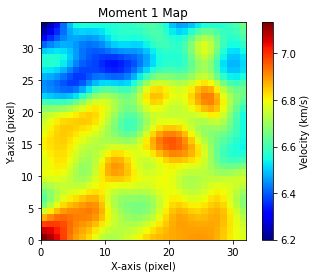

In [14]:
# 速度範囲の指定
min_velocity = 2  # 最小速度（km/s）
max_velocity = 12   # 最大速度（km/s）

velocity_mask = (velocity_axis_kms >= min_velocity) & (velocity_axis_kms <= max_velocity)
data_cube_cut = image_data[velocity_mask, :, :]
# モーメント1マップを計算する（重み付け平均速度を計算）
weighted_velocity = np.sum(data_cube_cut * velocity_axis_kms[velocity_mask, None, None], axis=0) / np.sum(data_cube_cut, axis=0)

# モーメント1マップをプロットする
plt.imshow(weighted_velocity, origin='lower', cmap='jet', extent=[0, header['NAXIS1'], 0, header['NAXIS2']])
plt.colorbar(label='Velocity (km/s)')
plt.xlabel('X-axis (pixel)')
plt.ylabel('Y-axis (pixel)')
plt.title('Moment 1 Map')
plt.show()